<a href="https://colab.research.google.com/github/sergioGarcia91/ML_Carolina_Bays/blob/main/10_Model_describe_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this Notebook, the CSV file containing information about the trained models will be analyzed. A total of **70 models** were trained, consisting of **30 linear regression models, 30 Random Forest models, and 10 Multilayer Perceptron (MLP) models** for the classification task. However, the CSV file only contains **60 models**, as due to Colab errors, the information for **10 Random Forest models** was not saved. The analysis will focus on the training data of the recorded models.

Only **10 MLP models** were trained because they required more training time, and it was not possible to reach the **30 planned models**.

# Start

In [ ]:
import numpy as np
import os
import time
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import h5py
import multiprocessing
import joblib

from IPython.display import clear_output

In [ ]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Change Font of the Figures

In [ ]:
!wget https://github.com/justrajdeep/fonts/raw/master/Times%20New%20Roman.ttf

--2025-03-13 13:34:20--  https://github.com/justrajdeep/fonts/raw/master/Times%20New%20Roman.ttf
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/justrajdeep/fonts/master/Times%20New%20Roman.ttf [following]
--2025-03-13 13:34:20--  https://raw.githubusercontent.com/justrajdeep/fonts/master/Times%20New%20Roman.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 834452 (815K) [application/octet-stream]
Saving to: ‘Times New Roman.ttf’

Times New Roman.ttf 100%[===================>] 814.89K  --.-KB/s    in 0.06s   

2025-03-13 13:34:20 (14.3 MB/s) - ‘Times New Roman.ttf’ saved [834452/834452]



In [ ]:
import matplotlib.font_manager as fm

In [ ]:
# Path to the custom font
font_path = 'Times New Roman.ttf'

# Add the font to the Matplotlib font manager
font_prop = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)

# Get the font name to use in rcParams
font_name = font_prop.get_name()
font_name

'Times New Roman'

In [ ]:
plt.rcParams['font.family'] = font_name

# Load CSV

In [ ]:
path_saveCSV = '/content/drive/MyDrive/UIS/Doctorado_UIS2198589/1_semestre/TopicosAvanzadosGeofisica/FC_CarolinaBais/ML_models'

df = pd.read_csv(os.path.join(path_saveCSV, 'df_70models_ML.csv'), sep=';', decimal=',')

df.head()

,Trial,Model,Train score,Test score,Elapsed time,Classifier
0,1,model_RegLog_001.pkl,0.649329,0.589066,347.99,Logistic Regression
1,2,model_RegLog_002.pkl,0.649541,0.588976,344.81,Logistic Regression
2,3,model_RegLog_003.pkl,0.649343,0.588130,328.49,Logistic Regression
3,4,model_RegLog_004.pkl,0.649452,0.589309,346.97,Logistic Regression
4,5,model_RegLog_005.pkl,0.649464,0.589543,373.14,Logistic Regression


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Trial         65 non-null     int64  
 1   Model         65 non-null     object 
 2   Train score   65 non-null     float64
 3   Test score    65 non-null     float64
 4   Elapsed time  65 non-null     float64
 5   Classifier    65 non-null     object 
dtypes: float64(3), int64(1), object(2)
memory usage: 3.2+ KB


In [ ]:
df.describe().round(2)

,Trial,Train score,Test score,Elapsed time
count,65.00,65.00,65.00,65.00
mean,33.00,0.65,0.59,1259.16
std,18.91,0.01,0.03,1770.67
min,1.00,0.64,0.40,323.62
25%,17.00,0.65,0.59,347.99
50%,33.00,0.65,0.59,470.81
75%,49.00,0.66,0.60,495.13
max,65.00,0.68,0.68,6807.46


## Logistic Regression

In [ ]:
df[df['Classifier'] == 'Logistic Regression'].describe().round(2)

,Trial,Train score,Test score,Elapsed time
count,30.00,30.00,30.00,30.00
mean,15.50,0.65,0.59,350.89
std,8.80,0.00,0.00,14.98
min,1.00,0.65,0.59,323.62
25%,8.25,0.65,0.59,345.08
50%,15.50,0.65,0.59,347.40
75%,22.75,0.65,0.59,363.15
max,30.00,0.65,0.59,383.13


The 30 logistic regression models had a training time per cycle (including dataset creation and model training) ranging from 5.4 minutes (323 seconds) to 6.4 minutes (383 seconds), with an average time of 5.9 minutes (351 seconds) per model.

## Random Forest

In [ ]:
df[df['Classifier'] == 'Random Forest'].describe().round(2)

,Trial,Train score,Test score,Elapsed time
count,20.00,20.00,20.00,20.00
mean,40.50,0.66,0.61,481.68
std,5.92,0.00,0.01,9.20
min,31.00,0.65,0.60,466.94
25%,35.75,0.66,0.60,477.32
50%,40.50,0.66,0.61,481.07
75%,45.25,0.66,0.61,485.23
max,50.00,0.66,0.62,507.96


The 20 Random Forest models had a training cycle time (including dataset creation and model training) ranging from 7.8 minutes (467 seconds) to 8.5 minutes (508 seconds), with an average time of 8 minutes (482 seconds) per model.

## MLPClassifier

In [ ]:
df[df['Classifier'] == 'MLPClassifier'].describe().round(2)

,Trial,Train score,Test score,Elapsed time
count,10.00,10.00,10.00,10.00
mean,55.50,0.66,0.57,3632.98
std,3.03,0.01,0.05,1795.69
min,51.00,0.64,0.51,1375.63
25%,53.25,0.66,0.55,2229.03
50%,55.50,0.67,0.56,3255.94
75%,57.75,0.67,0.57,4711.88
max,60.00,0.68,0.68,6807.46


The 10 MLP models required between 22.9 minutes (1376 seconds) and 113.5 minutes (6807 seconds) per training cycle, which includes dataset creation and model training. The average time per model was 60.6 minutes (3633 seconds).

The training times in the MLP vary because the number of iterations without changes in validation was reduced from 10 to 5.

---
Considering the average training times for each algorithm, it can be estimated that:  

- 5.9 min $\times$ 30 Logistic Regression Models = 177 min  
- 8.0 min $\times$ 30 Random Forest Models = 240 min  
- 60.6 min $\times$ 10 MLP Models = 606 min  
- Total training time for the 70 models $\approx$ 963 min (16.05 h)








## MLPClassifier_b

In [ ]:
df[df['Classifier'] == 'MLPClassifier_b'].describe().round(2)

,Trial,Train score,Test score,Elapsed time
count,5.00,5.00,5.00,5.00
mean,63.00,0.66,0.54,5071.04
std,1.58,0.01,0.08,1203.02
min,61.00,0.64,0.40,3133.09
25%,62.00,0.66,0.54,4831.50
50%,63.00,0.66,0.57,5448.71
75%,64.00,0.67,0.59,5644.06
max,65.00,0.67,0.59,6297.82


The 5 MLP models required between 52.2 minutes (3133.1 seconds) and 105 minutes (6298 seconds) per training cycle, which includes dataset creation and model training. The average time per model was 84.5 minutes (5071 seconds).

The training times in the MLP vary because the number of iterations without changes in validation was reduced from 10 to 5.

---
Considering the average training times for each algorithm, it can be estimated that:  

- 5.9 min $\times$ 30 Logistic Regression Models = 177 min  
- 8.0 min $\times$ 30 Random Forest Models = 240 min  
- 60.6 min $\times$ 10 MLP Models = 606 min
- 84.5 min $\times$ 5 MLP Models = 422.5 min
- Total training time for the 75 models $\approx$ 1385.5 min (23.09 h)








# Plots

In [ ]:
pathSavePlots = '/content/drive/MyDrive/UIS/Doctorado_UIS2198589/1_semestre/TopicosAvanzadosGeofisica/FC_CarolinaBais/Figures_Models/'

## Boxplots training time

In [ ]:
df.head()

,Trial,Model,Train score,Test score,Elapsed time,Classifier
0,1,model_RegLog_001.pkl,0.649329,0.589066,347.99,Logistic Regression
1,2,model_RegLog_002.pkl,0.649541,0.588976,344.81,Logistic Regression
2,3,model_RegLog_003.pkl,0.649343,0.588130,328.49,Logistic Regression
3,4,model_RegLog_004.pkl,0.649452,0.589309,346.97,Logistic Regression
4,5,model_RegLog_005.pkl,0.649464,0.589543,373.14,Logistic Regression


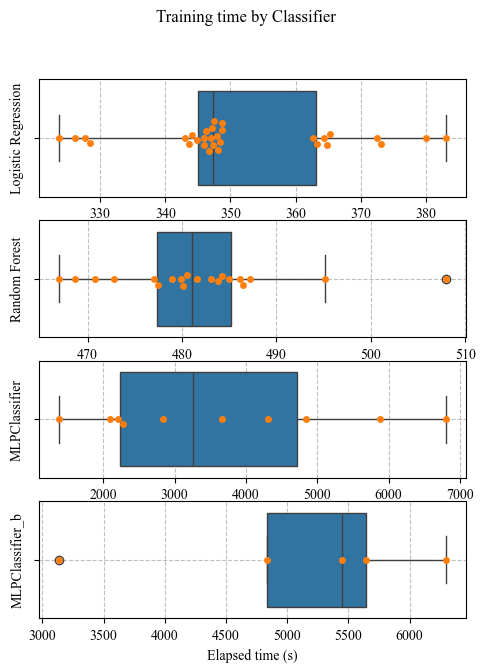

In [ ]:
plt.figure(figsize=(5.5, 7))

axes = [plt.subplot(4, 1, i + 1) for i in range(4)]
classifiers = ['Logistic Regression', 'Random Forest', 'MLPClassifier', 'MLPClassifier_b']

for ax, clf in zip(axes, classifiers):
    subset = df[df['Classifier'] == clf]

    # Boxplot y Swarmplot
    sns.boxplot(data=subset, x='Elapsed time', ax=ax)
    sns.swarmplot(data=subset, x='Elapsed time', ax=ax)

    ax.set_ylabel(clf)
    ax.grid(ls='--', alpha=0.5, color='grey')

plt.xlabel('Elapsed time (s)')
plt.suptitle('Training time by Classifier')
plt.savefig(pathSavePlots + f'Training_time.png',
            dpi=500,
            bbox_inches = 'tight',
            pad_inches=0.25)
plt.show()


## Boxplots Train score

In [ ]:
df.head()

,Trial,Model,Train score,Test score,Elapsed time,Classifier
0,1,model_RegLog_001.pkl,0.649329,0.589066,347.99,Logistic Regression
1,2,model_RegLog_002.pkl,0.649541,0.588976,344.81,Logistic Regression
2,3,model_RegLog_003.pkl,0.649343,0.588130,328.49,Logistic Regression
3,4,model_RegLog_004.pkl,0.649452,0.589309,346.97,Logistic Regression
4,5,model_RegLog_005.pkl,0.649464,0.589543,373.14,Logistic Regression


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 56.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


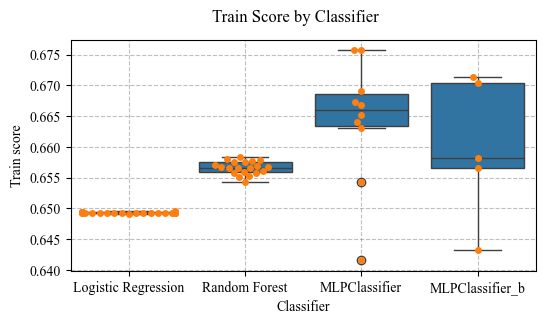

In [ ]:
plt.figure(figsize=(6, 3))

# Boxplot y Swarmplot
sns.boxplot(data=df, y='Train score', x='Classifier')
sns.swarmplot(data=df, y='Train score', x='Classifier')

plt.grid(ls='--', alpha=0.5, color='grey')


plt.suptitle('Train Score by Classifier')

plt.savefig(pathSavePlots + f'Train_score.png',
            dpi=500,
            bbox_inches='tight',
            pad_inches=0.25)

plt.show()

## Boxplots Test score

In [ ]:
df.head()

,Trial,Model,Train score,Test score,Elapsed time,Classifier
0,1,model_RegLog_001.pkl,0.649329,0.589066,347.99,Logistic Regression
1,2,model_RegLog_002.pkl,0.649541,0.588976,344.81,Logistic Regression
2,3,model_RegLog_003.pkl,0.649343,0.588130,328.49,Logistic Regression
3,4,model_RegLog_004.pkl,0.649452,0.589309,346.97,Logistic Regression
4,5,model_RegLog_005.pkl,0.649464,0.589543,373.14,Logistic Regression


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 56.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


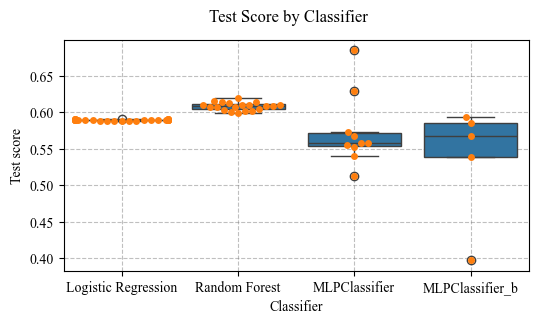

In [ ]:
plt.figure(figsize=(6, 3))

# Boxplot y Swarmplot
sns.boxplot(data=df, y='Test score', x='Classifier')
sns.swarmplot(data=df, y='Test score', x='Classifier')

plt.grid(ls='--', alpha=0.5, color='grey')


plt.suptitle('Test Score by Classifier')

plt.savefig(pathSavePlots + f'Test_score.png',
            dpi=500,
            bbox_inches='tight',
            pad_inches=0.25)

plt.show()

# Feature importance

## Load models

In [ ]:
path_models = '/content/drive/MyDrive/UIS/Doctorado_UIS2198589/1_semestre/TopicosAvanzadosGeofisica/FC_CarolinaBais/ML_models'

models_list = os.listdir(path_models)
models_list = [model for model in models_list if model.endswith('.pkl')]
models_list

['model_RegLog_002.pkl',
 'model_RegLog_003.pkl',
 'model_RegLog_004.pkl',
 'model_RegLog_005.pkl',
 'model_RegLog_006.pkl',
 'model_RegLog_007.pkl',
 'model_RegLog_008.pkl',
 'model_RegLog_009.pkl',
 'model_RegLog_010.pkl',
 'model_RegLog_001.pkl',
 'model_RegLog_011.pkl',
 'model_RegLog_012.pkl',
 'model_RegLog_013.pkl',
 'model_RegLog_014.pkl',
 'model_RegLog_015.pkl',
 'model_RegLog_016.pkl',
 'model_RegLog_017.pkl',
 'model_RegLog_018.pkl',
 'model_RegLog_019.pkl',
 'model_RegLog_020.pkl',
 'model_RegLog_021.pkl',
 'model_RegLog_022.pkl',
 'model_RegLog_023.pkl',
 'model_RegLog_024.pkl',
 'model_RegLog_025.pkl',
 'model_RegLog_026.pkl',
 'model_RegLog_027.pkl',
 'model_RegLog_028.pkl',
 'model_RegLog_029.pkl',
 'model_RegLog_030.pkl',
 'model_RandForest_001.pkl',
 'model_RandForest_002.pkl',
 'model_RandForest_003.pkl',
 'model_RandForest_004.pkl',
 'model_RandForest_005.pkl',
 'model_RandForest_006.pkl',
 'model_RandForest_007.pkl',
 'model_RandForest_008.pkl',
 'model_RandForest

In [ ]:
models_list = [model for model in models_list if not ('MLP' in model)]
len(models_list)

60

In [ ]:
weights_list = []
clasifier_list = []

for model in models_list:
  if 'Reg' in model:
    model_load = joblib.load(os.path.join(path_models, model))
    print(model)
    print(model_load.coef_.shape)
    weights_list.append(model_load.coef_[0])
    clasifier_list.append('Logistic Regression')

  else:
    model_load = joblib.load(os.path.join(path_models, model))
    print(model)
    print(model_load.feature_importances_.reshape(1, -1).shape)
    weights_list.append(model_load.feature_importances_.reshape(1, -1)[0])
    clasifier_list.append('Random Forest')


model_RegLog_002.pkl
(1, 28)
model_RegLog_003.pkl
(1, 28)
model_RegLog_004.pkl
(1, 28)
model_RegLog_005.pkl
(1, 28)
model_RegLog_006.pkl
(1, 28)
model_RegLog_007.pkl
(1, 28)
model_RegLog_008.pkl
(1, 28)
model_RegLog_009.pkl
(1, 28)
model_RegLog_010.pkl
(1, 28)
model_RegLog_001.pkl
(1, 28)
model_RegLog_011.pkl
(1, 28)
model_RegLog_012.pkl
(1, 28)
model_RegLog_013.pkl
(1, 28)
model_RegLog_014.pkl
(1, 28)
model_RegLog_015.pkl
(1, 28)
model_RegLog_016.pkl
(1, 28)
model_RegLog_017.pkl
(1, 28)
model_RegLog_018.pkl
(1, 28)
model_RegLog_019.pkl
(1, 28)
model_RegLog_020.pkl
(1, 28)
model_RegLog_021.pkl
(1, 28)
model_RegLog_022.pkl
(1, 28)
model_RegLog_023.pkl
(1, 28)
model_RegLog_024.pkl
(1, 28)
model_RegLog_025.pkl
(1, 28)
model_RegLog_026.pkl
(1, 28)
model_RegLog_027.pkl
(1, 28)
model_RegLog_028.pkl
(1, 28)
model_RegLog_029.pkl
(1, 28)
model_RegLog_030.pkl
(1, 28)
model_RandForest_001.pkl
(1, 28)
model_RandForest_002.pkl
(1, 28)
model_RandForest_003.pkl
(1, 28)
model_RandForest_004.pkl
(1, 28

In [ ]:
weights_list[0]

array([-20.95198   ,   2.1640196 ,  57.3901    , -30.962332  ,
        -3.8611474 , -15.857899  ,  14.466916  ,   0.97641873,
        17.795603  , -18.080902  ,   4.0411468 , -21.381958  ,
         7.5029597 , -15.618419  ,  13.300282  , -35.413815  ,
        14.113189  ,  14.117816  ,  19.005926  ,  15.663429  ,
       -10.538291  ,  16.064127  ,  13.485243  ,  33.23153   ,
       -35.23457   , -18.425013  ,  11.933792  ,  -0.43539461],
      dtype=float32)

In [ ]:
bands = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7',
         'B2_B1', 'B3_B1', 'B4_B1', 'B5_B1', 'B6_B1', 'B7_B1',
         'B3_B2', 'B4_B2', 'B5_B2', 'B6_B2', 'B7_B2',
         'B4_B3', 'B5_B3', 'B6_B3', 'B7_B3',
         'B5_B4', 'B6_B4', 'B7_B4',
         'B6_B5', 'B7_B5',
         'B7_B6']

df_feature_importance = pd.DataFrame(weights_list,
                                     columns=bands)

df_feature_importance['Classifier'] = clasifier_list

df_feature_importance.head()

,B1,B2,B3,B4,B5,B6,B7,B2_B1,B3_B1,B4_B1,...,B5_B3,B6_B3,B7_B3,B5_B4,B6_B4,B7_B4,B6_B5,B7_B5,B7_B6,Classifier
0,-20.951981,2.164020,57.390099,-30.962332,-3.861147,-15.857899,14.466916,0.976419,17.795603,-18.080902,...,15.663429,-10.538291,16.064127,13.485243,33.231529,-35.234570,-18.425013,11.933792,-0.435395,Logistic Regression
1,-20.806808,2.041968,57.445824,-31.047583,-3.877799,-15.743537,14.352256,0.979007,18.004412,-18.117207,...,15.812943,-10.704018,16.147078,13.526115,33.198067,-35.318905,-18.439884,12.040335,-0.486740,Logistic Regression
2,-20.918682,2.017320,57.569477,-31.025099,-3.875477,-15.751950,14.309515,0.989743,18.006678,-18.286188,...,15.910493,-10.874646,16.153557,13.490039,33.166168,-35.136600,-18.406094,12.009922,-0.632654,Logistic Regression
3,-20.811575,1.939511,57.617329,-31.090557,-3.852110,-15.837375,14.379459,0.981842,18.049496,-18.213064,...,15.999623,-10.683621,16.012991,13.337287,33.214005,-35.121178,-18.295605,11.920590,-0.366915,Logistic Regression
4,-21.005146,2.089249,57.709400,-31.106792,-3.865369,-15.909779,14.472587,0.974520,17.776741,-18.069103,...,15.827222,-10.598543,16.112247,13.509243,33.112747,-35.177338,-18.203714,11.754927,-0.346629,Logistic Regression


In [ ]:
df_feature_importance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   B1          60 non-null     float64
 1   B2          60 non-null     float64
 2   B3          60 non-null     float64
 3   B4          60 non-null     float64
 4   B5          60 non-null     float64
 5   B6          60 non-null     float64
 6   B7          60 non-null     float64
 7   B2_B1       60 non-null     float64
 8   B3_B1       60 non-null     float64
 9   B4_B1       60 non-null     float64
 10  B5_B1       60 non-null     float64
 11  B6_B1       60 non-null     float64
 12  B7_B1       60 non-null     float64
 13  B3_B2       60 non-null     float64
 14  B4_B2       60 non-null     float64
 15  B5_B2       60 non-null     float64
 16  B6_B2       60 non-null     float64
 17  B7_B2       60 non-null     float64
 18  B4_B3       60 non-null     float64
 19  B5_B3       60 non-null     flo

In [ ]:
df_feature_importance.describe().round(2)

,B1,B2,B3,B4,B5,B6,B7,B2_B1,B3_B1,B4_B1,...,B4_B3,B5_B3,B6_B3,B7_B3,B5_B4,B6_B4,B7_B4,B6_B5,B7_B5,B7_B6
count,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00,...,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00
mean,-10.43,1.01,28.79,-15.51,-1.91,-7.88,7.19,0.50,8.92,-9.02,...,9.55,7.91,-5.32,8.09,6.74,16.64,-17.58,-9.20,6.00,-0.22
std,10.53,1.01,29.00,15.66,1.97,7.99,7.23,0.48,8.98,9.16,...,9.54,7.96,5.40,8.09,6.78,16.68,17.75,9.30,6.04,0.32
min,-21.02,0.00,0.02,-31.13,-3.89,-15.91,0.01,0.01,0.00,-18.37,...,0.06,0.01,-10.95,0.04,0.00,0.05,-35.32,-18.66,0.00,-0.76
25%,-20.88,0.02,0.03,-31.04,-3.86,-15.80,0.02,0.03,0.01,-18.09,...,0.09,0.02,-10.67,0.07,0.02,0.10,-35.19,-18.42,0.01,-0.52
50%,-10.34,0.89,28.71,-15.43,-1.90,-7.84,7.13,0.51,8.81,-8.98,...,9.52,7.80,-5.22,8.01,6.65,16.56,-17.53,-9.09,5.89,-0.15
75%,0.01,2.02,57.58,0.02,0.05,0.03,14.36,0.98,17.81,0.06,...,19.01,15.81,0.03,16.12,13.46,33.16,0.02,0.02,11.98,0.07
max,0.02,2.16,57.71,0.04,0.07,0.05,14.48,1.00,18.11,0.11,...,19.10,16.00,0.05,16.31,13.70,33.36,0.03,0.04,12.21,0.10


## Describe Logistic Regression

In [ ]:
df_logReg = df_feature_importance[df_feature_importance['Classifier'] == 'Logistic Regression']
df_logReg.describe().round(2)

,B1,B2,B3,B4,B5,B6,B7,B2_B1,B3_B1,B4_B1,...,B4_B3,B5_B3,B6_B3,B7_B3,B5_B4,B6_B4,B7_B4,B6_B5,B7_B5,B7_B6
count,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,...,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00
mean,-20.88,2.01,57.55,-31.03,-3.87,-15.80,14.36,0.98,17.83,-18.10,...,19.01,15.81,-10.67,16.12,13.46,33.18,-35.18,-18.42,11.98,-0.53
std,0.10,0.09,0.10,0.06,0.01,0.05,0.07,0.01,0.13,0.09,...,0.04,0.09,0.12,0.09,0.09,0.09,0.07,0.09,0.10,0.13
min,-21.02,1.74,57.36,-31.13,-3.89,-15.91,14.22,0.96,17.59,-18.37,...,18.91,15.57,-10.95,15.94,13.28,32.97,-35.32,-18.66,11.75,-0.76
25%,-20.95,1.97,57.49,-31.08,-3.87,-15.84,14.32,0.97,17.75,-18.14,...,18.99,15.76,-10.75,16.06,13.40,33.13,-35.23,-18.47,11.92,-0.63
50%,-20.88,2.02,57.58,-31.04,-3.87,-15.80,14.36,0.98,17.81,-18.09,...,19.01,15.82,-10.68,16.12,13.46,33.16,-35.19,-18.42,11.99,-0.52
75%,-20.81,2.08,57.63,-30.99,-3.86,-15.77,14.40,0.98,17.89,-18.02,...,19.05,15.86,-10.58,16.18,13.51,33.24,-35.14,-18.38,12.04,-0.44
max,-20.67,2.16,57.71,-30.87,-3.84,-15.71,14.48,1.00,18.11,-17.97,...,19.10,16.00,-10.46,16.31,13.70,33.36,-35.07,-18.20,12.21,-0.33


## Describe Random Forest

In [ ]:
df_randForest = df_feature_importance[df_feature_importance['Classifier'] == 'Random Forest']
df_randForest.describe().round(2)

,B1,B2,B3,B4,B5,B6,B7,B2_B1,B3_B1,B4_B1,...,B4_B3,B5_B3,B6_B3,B7_B3,B5_B4,B6_B4,B7_B4,B6_B5,B7_B5,B7_B6
count,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,...,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00
mean,0.01,0.02,0.03,0.02,0.05,0.04,0.02,0.03,0.01,0.06,...,0.09,0.02,0.03,0.07,0.01,0.10,0.02,0.02,0.01,0.08
std,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.02,...,0.02,0.01,0.01,0.01,0.01,0.03,0.01,0.01,0.00,0.01
min,0.00,0.00,0.02,0.01,0.04,0.02,0.01,0.01,0.00,0.02,...,0.06,0.01,0.01,0.04,0.00,0.05,0.01,0.02,0.00,0.04
25%,0.01,0.01,0.03,0.02,0.04,0.03,0.02,0.02,0.01,0.05,...,0.08,0.01,0.03,0.07,0.01,0.08,0.01,0.02,0.01,0.07
50%,0.01,0.02,0.03,0.02,0.05,0.03,0.02,0.03,0.01,0.06,...,0.09,0.02,0.03,0.07,0.02,0.10,0.02,0.02,0.01,0.07
75%,0.01,0.02,0.04,0.02,0.06,0.04,0.03,0.03,0.01,0.07,...,0.11,0.03,0.03,0.08,0.02,0.12,0.02,0.03,0.01,0.08
max,0.02,0.03,0.05,0.04,0.07,0.05,0.04,0.06,0.03,0.11,...,0.13,0.04,0.05,0.09,0.02,0.14,0.03,0.04,0.02,0.10


## Random Forest

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 26.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 13.3% of the points cannot be plac

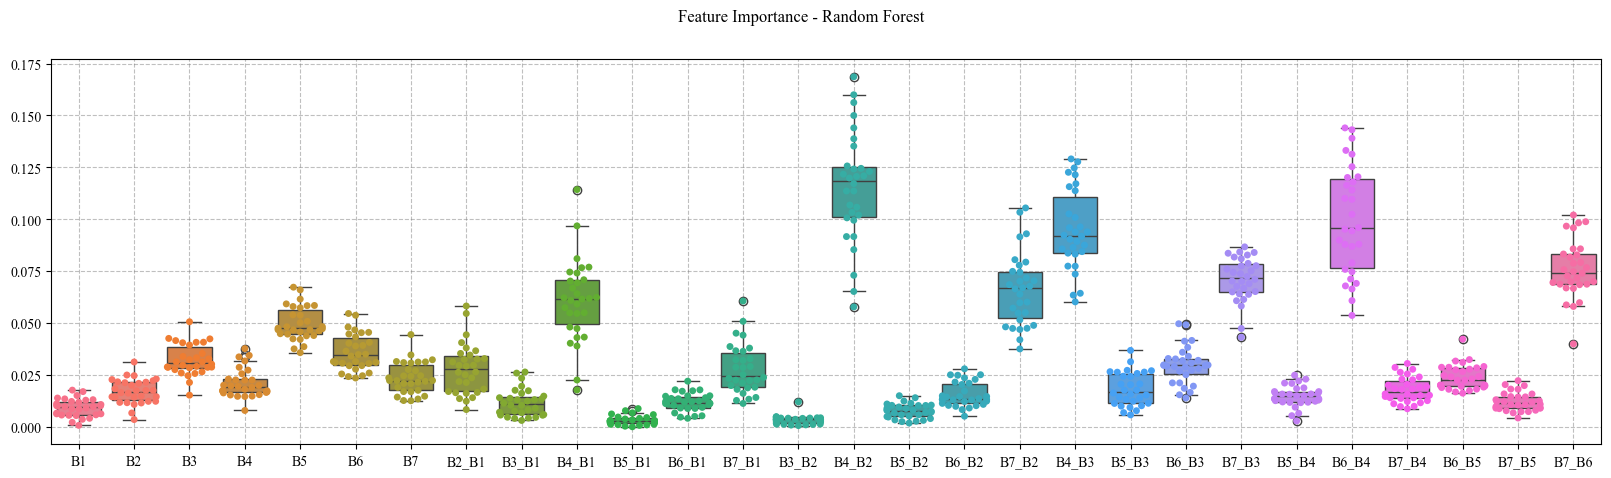

In [ ]:
plt.figure(figsize=(20, 5))

# Boxplot y Swarmplot
sns.boxplot(data=df_randForest)
sns.swarmplot(data=df_randForest)

plt.grid(ls='--', alpha=0.5, color='grey')


plt.suptitle('Feature Importance - Random Forest')

plt.savefig(pathSavePlots + 'Feature_importance_random_forest.png',
            dpi=500,
            bbox_inches='tight',
            pad_inches=0.25)

plt.show()

In [ ]:
df_randForest.iloc[:, :-1].mean()

,0
B1,0.009309
B2,0.017098
B3,0.032330
B4,0.021012
B5,0.049792
B6,0.035994
B7,0.023702
B2_B1,0.027978
B3_B1,0.011728
B4_B1,0.060941


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 26.7% of the points cannot be plac

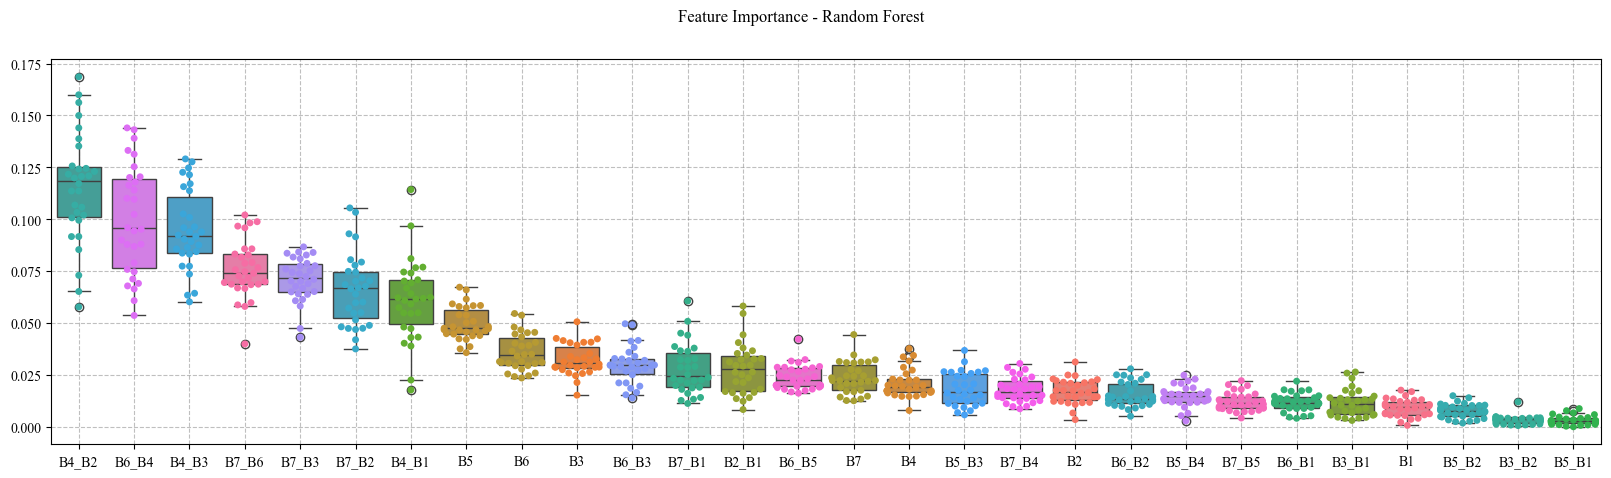

In [ ]:
plt.figure(figsize=(20, 5))

# Boxplot y Swarmplot
sns.boxplot(data=df_randForest.iloc[:, :-1],
            order=df_randForest.iloc[:, :-1].mean().sort_values(ascending=False).index)

sns.swarmplot(data=df_randForest.iloc[:, :-1],
              order=df_randForest.iloc[:, :-1].mean().sort_values(ascending=False).index)

plt.grid(ls='--', alpha=0.5, color='grey')


plt.suptitle('Feature Importance - Random Forest')

plt.savefig(pathSavePlots + 'Feature_importance_random_forest_sort.png',
            dpi=500,
            bbox_inches='tight',
            pad_inches=0.25)

plt.show()

## Logistic Regression

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 83.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 76.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


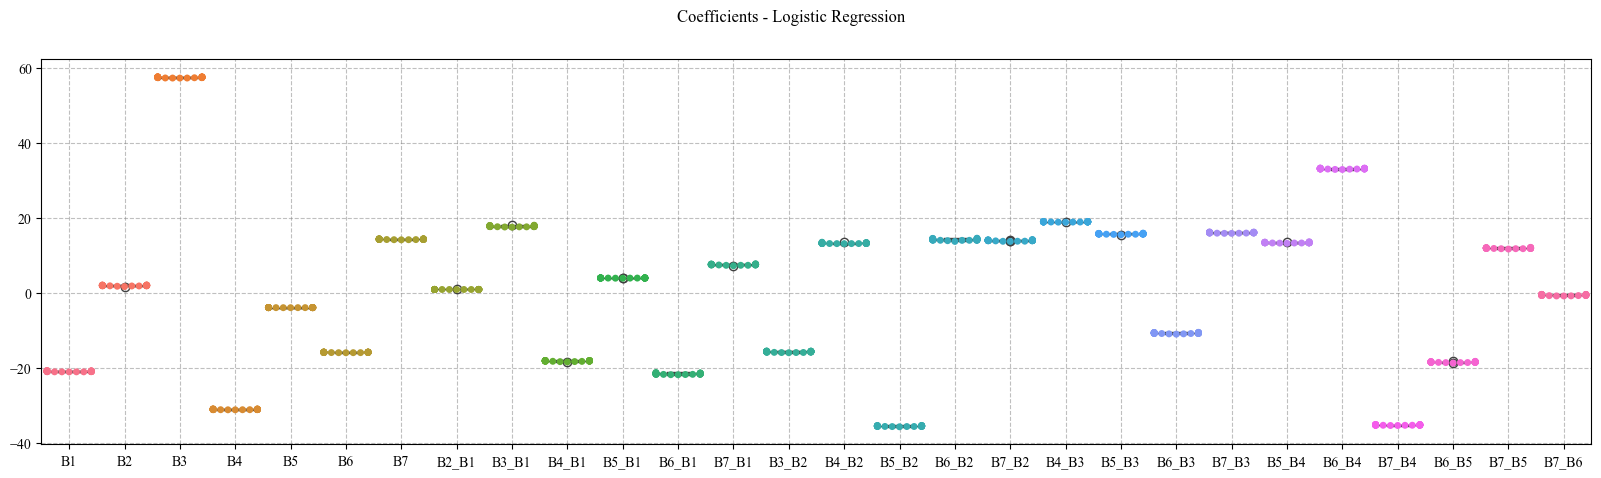

In [ ]:
plt.figure(figsize=(20, 5))

# Boxplot y Swarmplot
sns.boxplot(data=df_logReg)
sns.swarmplot(data=df_logReg)

plt.grid(ls='--', alpha=0.5, color='grey')

plt.suptitle('Coefficients - Logistic Regression')

plt.savefig(pathSavePlots + 'Coef_logistic_regression.png',
            dpi=500,
            bbox_inches='tight',
            pad_inches=0.25)


plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 83.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 76.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


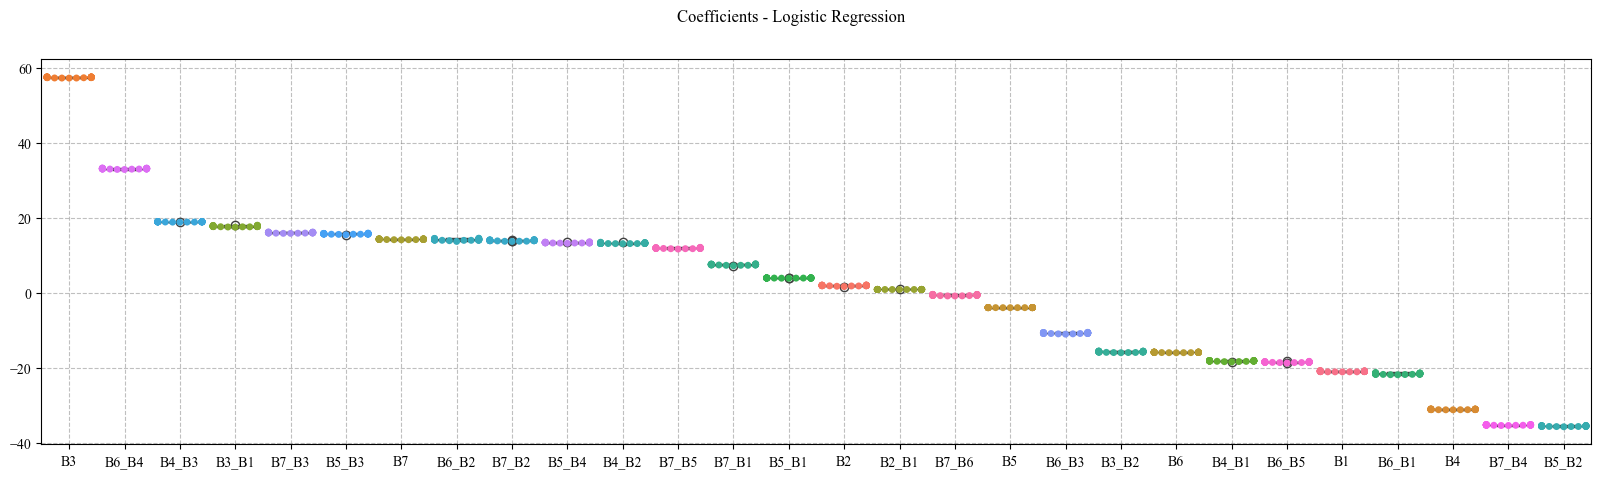

In [ ]:
plt.figure(figsize=(20, 5))

# Boxplot y Swarmplot
sns.boxplot(data=df_logReg.iloc[:,:-1],
            order=df_logReg.iloc[:,:-1].mean().sort_values(ascending=False).index)

sns.swarmplot(data=df_logReg.iloc[:,:-1],
              order=df_logReg.iloc[:,:-1].mean().sort_values(ascending=False).index)

plt.grid(ls='--', alpha=0.5, color='grey')

plt.suptitle('Coefficients - Logistic Regression')

plt.savefig(pathSavePlots + 'Coef_logistic_regression_sort.png',
            dpi=500,
            bbox_inches='tight',
            pad_inches=0.25)


plt.show()

In [ ]:
df_logReg.iloc[:, :-1].abs()

,B1,B2,B3,B4,B5,B6,B7,B2_B1,B3_B1,B4_B1,...,B4_B3,B5_B3,B6_B3,B7_B3,B5_B4,B6_B4,B7_B4,B6_B5,B7_B5,B7_B6
0,20.951981,2.164020,57.390099,30.962332,3.861147,15.857899,14.466916,0.976419,17.795603,18.080902,...,19.005926,15.663429,10.538291,16.064127,13.485243,33.231529,35.234570,18.425013,11.933792,0.435395
1,20.806808,2.041968,57.445824,31.047583,3.877799,15.743537,14.352256,0.979007,18.004412,18.117207,...,18.906235,15.812943,10.704018,16.147078,13.526115,33.198067,35.318905,18.439884,12.040335,0.486740
2,20.918682,2.017320,57.569477,31.025099,3.875477,15.751950,14.309515,0.989743,18.006678,18.286188,...,19.016294,15.910493,10.874646,16.153557,13.490039,33.166168,35.136600,18.406094,12.009922,0.632654
3,20.811575,1.939511,57.617329,31.090557,3.852110,15.837375,14.379459,0.981842,18.049496,18.213064,...,19.003397,15.999623,10.683621,16.012991,13.337287,33.214005,35.121178,18.295605,11.920590,0.366915
4,21.005146,2.089249,57.709400,31.106792,3.865369,15.909779,14.472587,0.974520,17.776741,18.069103,...,19.012859,15.827222,10.598543,16.112247,13.509243,33.112747,35.177338,18.203714,11.754927,0.346629
5,20.674267,1.744223,57.589161,30.991930,3.857886,15.775597,14.273834,0.979897,17.996176,18.264275,...,19.048607,15.732690,10.651190,16.127726,13.466541,33.312439,35.193165,18.521278,12.114561,0.638488
6,20.856699,1.956892,57.640919,31.072113,3.868576,15.833575,14.415068,0.977359,17.756048,18.054466,...,18.992664,15.754230,10.687518,16.192238,13.524960,33.126312,35.198715,18.389259,11.962937,0.632313
7,21.001513,2.076330,57.649338,31.046118,3.888433,15.729399,14.246608,0.970023,17.846664,18.085649,...,19.010639,15.821828,10.736632,16.193457,13.457606,33.221516,35.212307,18.534628,12.093982,0.599886
8,20.921957,1.987033,57.605728,30.995905,3.865948,15.791282,14.292832,0.977325,17.725422,18.077757,...,19.057859,15.902444,10.728844,16.110683,13.461330,33.269505,35.255962,18.366882,11.919642,0.445618
9,20.789705,2.015409,57.376682,30.964815,3.853009,15.774937,14.337868,0.986548,17.863937,18.161167,...,18.992319,15.761123,10.779551,16.183990,13.535369,33.065903,35.146957,18.447283,12.060301,0.660302


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 83.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 76.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


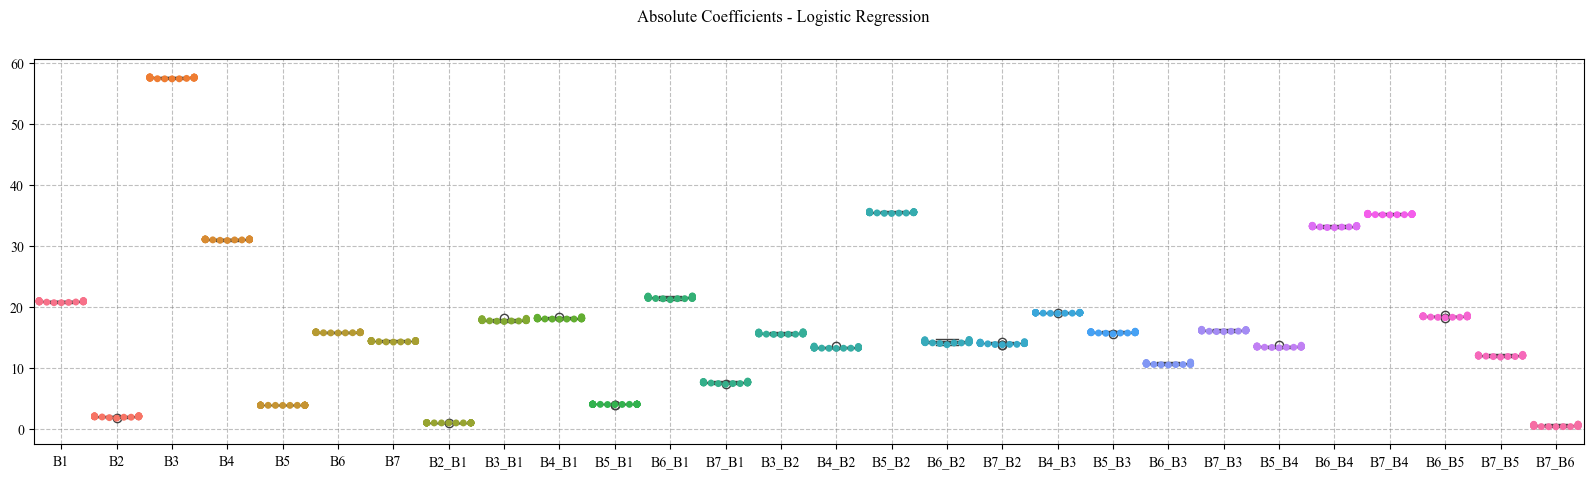

In [ ]:
plt.figure(figsize=(20, 5))

# Boxplot y Swarmplot con valores absolutos
sns.boxplot(data=df_logReg.iloc[:, :-1].abs())
sns.swarmplot(data=df_logReg.iloc[:, :-1].abs())

plt.grid(ls='--', alpha=0.5, color='grey')

plt.suptitle('Absolute Coefficients - Logistic Regression')

plt.savefig(pathSavePlots + 'Coef_abs_logistic_regression.png',
            dpi=500,
            bbox_inches='tight',
            pad_inches=0.25)

plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 83.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 76.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


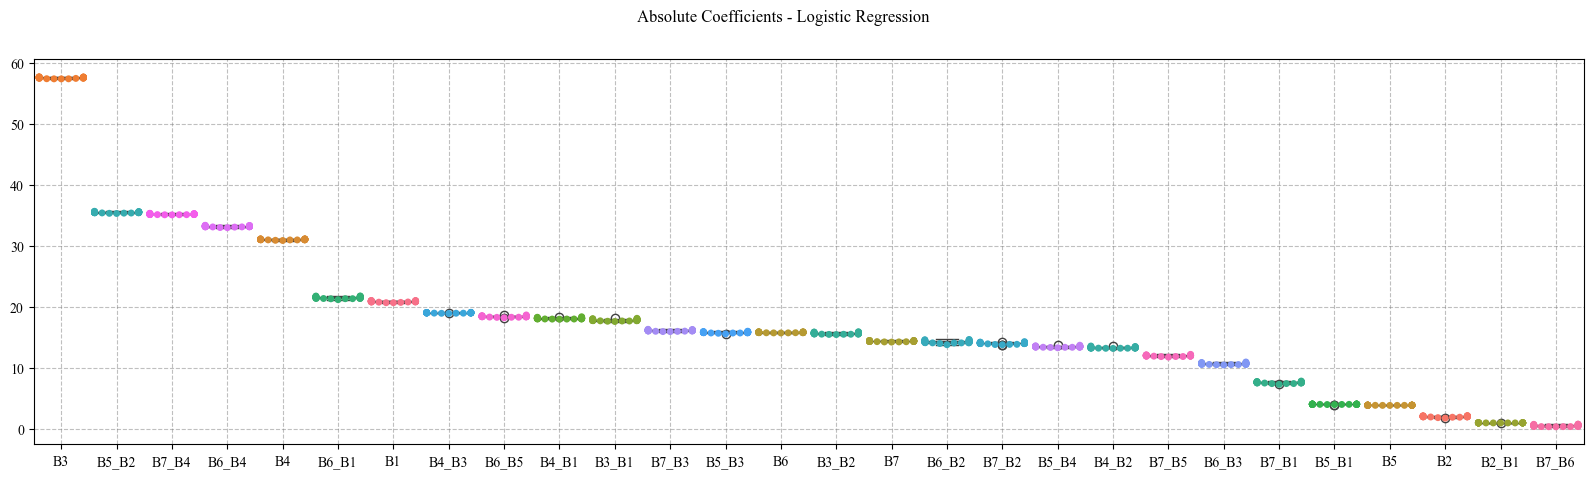

In [ ]:
plt.figure(figsize=(20, 5))

# Boxplot y Swarmplot con valores absolutos
sns.boxplot(data=df_logReg.iloc[:, :-1].abs(),
            order=df_logReg.iloc[:, :-1].abs().mean().sort_values(ascending=False).index)

sns.swarmplot(data=df_logReg.iloc[:, :-1].abs(),
              order=df_logReg.iloc[:, :-1].abs().mean().sort_values(ascending=False).index)

plt.grid(ls='--', alpha=0.5, color='grey')

plt.suptitle('Absolute Coefficients - Logistic Regression')

plt.savefig(pathSavePlots + 'Coef_abs_logistic_regression_sort.png',
            dpi=500,
            bbox_inches='tight',
            pad_inches=0.25)

plt.show()

# CSV sort

In [ ]:
logReg_columns = df_logReg.iloc[:, :-1].abs().mean().sort_values(ascending=False).index.values
randForest_columns = df_randForest.iloc[:, :-1].abs().mean().sort_values(ascending=False).index

# Create a DataFrame with the two lists
combined_df = pd.DataFrame({
    'Order': np.arange(1, len(logReg_columns) + 1),
    'Logistic Regression': logReg_columns,
    'Random Forest': randForest_columns
})

combined_df

,Order,Logistic Regression,Random Forest
0,1,B3,B4_B2
1,2,B5_B2,B6_B4
2,3,B7_B4,B4_B3
3,4,B6_B4,B7_B6
4,5,B4,B7_B3
5,6,B6_B1,B7_B2
6,7,B1,B4_B1
7,8,B4_B3,B5
8,9,B6_B5,B6
9,10,B4_B1,B3


## Save CSV

In [ ]:
combined_df.to_csv(os.path.join(path_models, 'df_order_features.csv'),
                   sep=';',
                   decimal=',',
                   index=False)

# End